In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
#  数据获取与解析
data = pd.read_csv("creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.isnull().any()  #判断空值的方法

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [4]:
# 1. 特征缩放
scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data['Amount'].values.reshape(-1, 1))

data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [5]:
# 2. 时间特征处理
data['Time'] = data['Time'] / 3600  # 转换时间单位为每小时
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,0.000278,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,0.000278,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,0.000556,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [6]:
count = data["Class"].value_counts()
count

Class
0    284315
1       492
Name: count, dtype: int64

<Axes: xlabel='Class'>

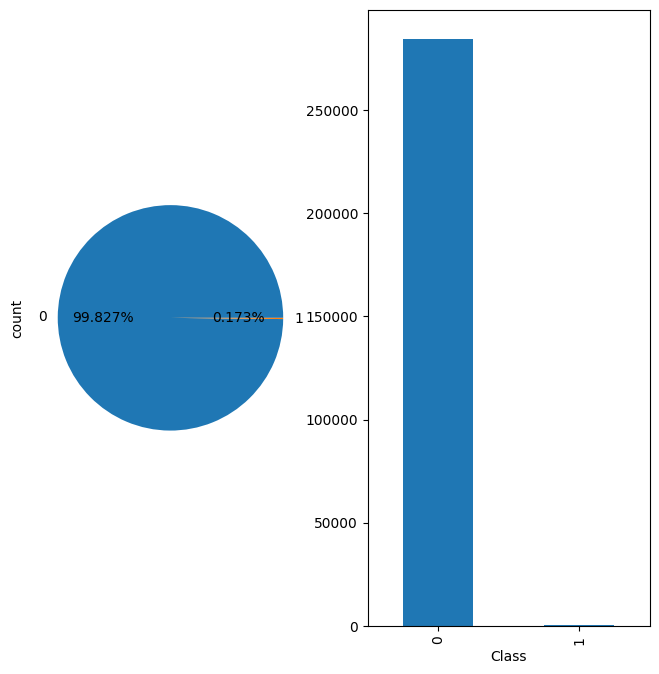

In [7]:
plt.figure(figsize=(8,8))
# 饼图
ax = plt.subplot(1,2,1)
count.plot(kind = 'pie',autopct = '%0.3f%%',ax = ax)

# 柱状图
ax = plt.subplot(1,2,2)
count.plot(kind = 'bar',ax = ax)

### 特征转换,将时间从单位每秒化为单位每小时

In [8]:
# map apply
data['Time'] = data['Time'].map(lambda x:divmod(x,3600)[0])
#map 只能处理series
#apply既能处理series,也能处理dataframe
#agg处理dataframe，仅仅针对聚合函数

In [9]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,0.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,0.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,0.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,0.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350151,0
284803,0.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254117,0
284804,0.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.081839,0
284805,0.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313249,0


## 特征选择

<Axes: ylabel='Frequency'>

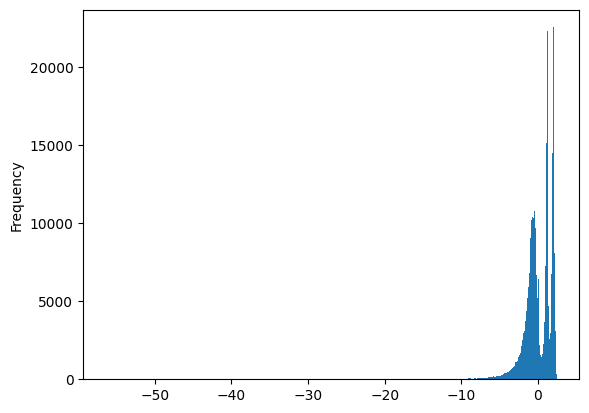

In [10]:
# 被骗
cheated = data['Class'] == 1
# 未被骗
uncheated = data['Class'] == 0

# 绘图
data['V1'][uncheated].plot(kind = 'hist',bins = 500)
data['V1'][cheated].plot(kind = 'hist',bins = 50)


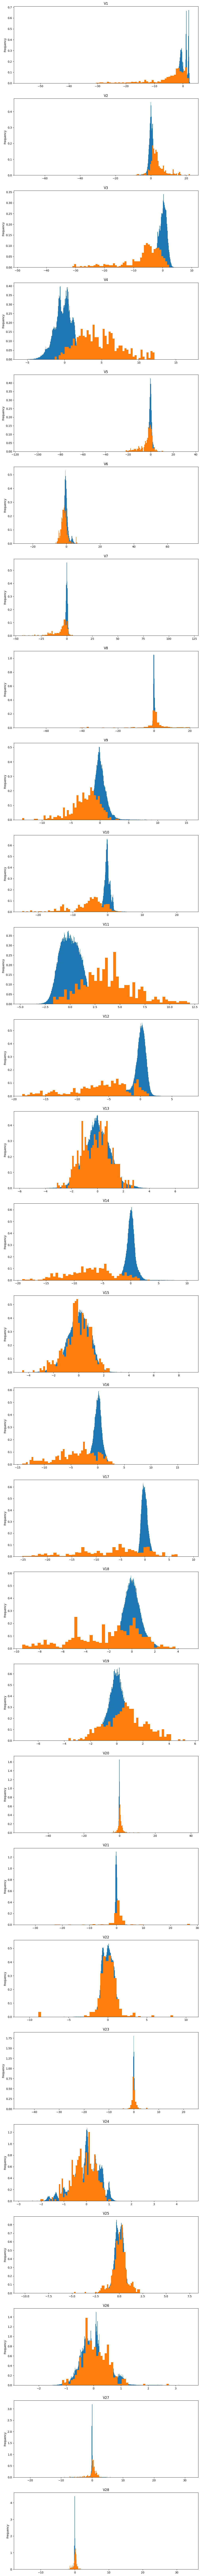

In [11]:
cols = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']

drop_list = ['V1', 'V3', 'V5']

cond_0 = data['Class'] == 0
cond_1 = data['Class'] == 1
plt.figure(figsize=(12, 28*6))

for i, col in enumerate(cols):
    ax = plt.subplot(28, 1, i+1)

    data[col][cond_0].plot(kind='hist', bins=500, density=True, ax=ax)
    data[col][cond_1].plot(kind='hist', bins=50, density=True, ax=ax)

    ax.set_title(col)


In [12]:
drops = ['V13','V15','V20','V22','V23','V24','V25','V26','V27','V28']

data2 = data.drop(labels=drops,axis = 1)

In [13]:
data2

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V11,V12,V14,V16,V17,V18,V19,V21,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791,0.403993,-0.018307,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,1.612727,1.065235,-0.143772,0.463917,-0.114805,-0.183361,-0.145783,-0.225775,-0.342475,0
2,0.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.624501,0.066084,-0.165946,-2.890083,1.109969,-0.121359,-2.261857,0.247998,1.160686,0
3,0.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,1.965775,-1.232622,-0.108300,0.140534,0
4,0.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,-0.038195,0.803487,-0.009431,-0.073403,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,0.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,-1.593105,2.711941,4.626942,1.107641,1.991691,0.510632,-0.682920,0.213454,-0.350151,0
284803,0.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,-0.150189,0.915802,-0.675143,-0.711757,-0.025693,-1.221179,-1.545556,0.214205,-0.254117,0
284804,0.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.411614,0.063119,-0.510602,0.140716,0.313502,0.395652,-0.577252,0.232045,-0.081839,0
284805,0.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,-1.933849,-0.962886,0.449624,-0.608577,0.509928,1.113981,2.897849,0.265245,-0.313249,0


In [14]:
data.shape

(284807, 31)

In [15]:

data2.shape

(284807, 21)

In [16]:
from sklearn.preprocessing import StandardScaler
data2['Amount'].max()

102.36224270928423

In [17]:
data2['Amount'].min()


-0.35322939296682354

In [18]:
data2['V8'].max()

20.0072083651213

In [19]:
data2['V8'].min()

-73.2167184552674

In [20]:
standScaler = StandardScaler()

cols = ['Time','Amount']

data2[cols] = standScaler.fit_transform(data2[cols])

In [21]:
data2['Amount'].max()

102.36224270928423

In [22]:
data2['Amount'].min()

-0.3532293929668236

In [23]:
data2['Time'].min()

0.0

In [24]:
data2['Time'].max()

0.0

In [25]:
data2.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V14', 'V16', 'V17', 'V18', 'V19', 'V21', 'Amount',
       'Class'],
      dtype='object')

In [26]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()

X_train = data2.iloc[:,:-1]

y_train = data2['Class']
clf.fit(X_train,y_train)

GradientBoostingClassifier()

In [27]:
X_train.shape

(284807, 20)

In [28]:
feature_importances_ = clf.feature_importances_
feature_importances_

array([0.00000000e+00, 0.00000000e+00, 3.23160854e-04, 1.87835765e-03,
       5.10212149e-05, 0.00000000e+00, 2.22464233e-02, 5.28756757e-03,
       4.92866302e-03, 0.00000000e+00, 1.18623730e-02, 1.25685663e-02,
       2.65924854e-03, 2.36544723e-01, 9.44799733e-03, 6.91700861e-01,
       5.10212149e-05, 0.00000000e+00, 4.50015808e-04, 0.00000000e+00])

In [29]:
cols = X_train.columns
cols

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V14', 'V16', 'V17', 'V18', 'V19', 'V21', 'Amount'],
      dtype='object')

In [30]:
# 从大到小进行排列
index = feature_importances_.argsort()[::-1]
index

array([15, 13,  6, 11, 10, 14,  7,  8, 12,  3, 18,  2, 16,  4, 19,  1,  9,
        5, 17,  0], dtype=int64)

In [31]:
len(index)

20

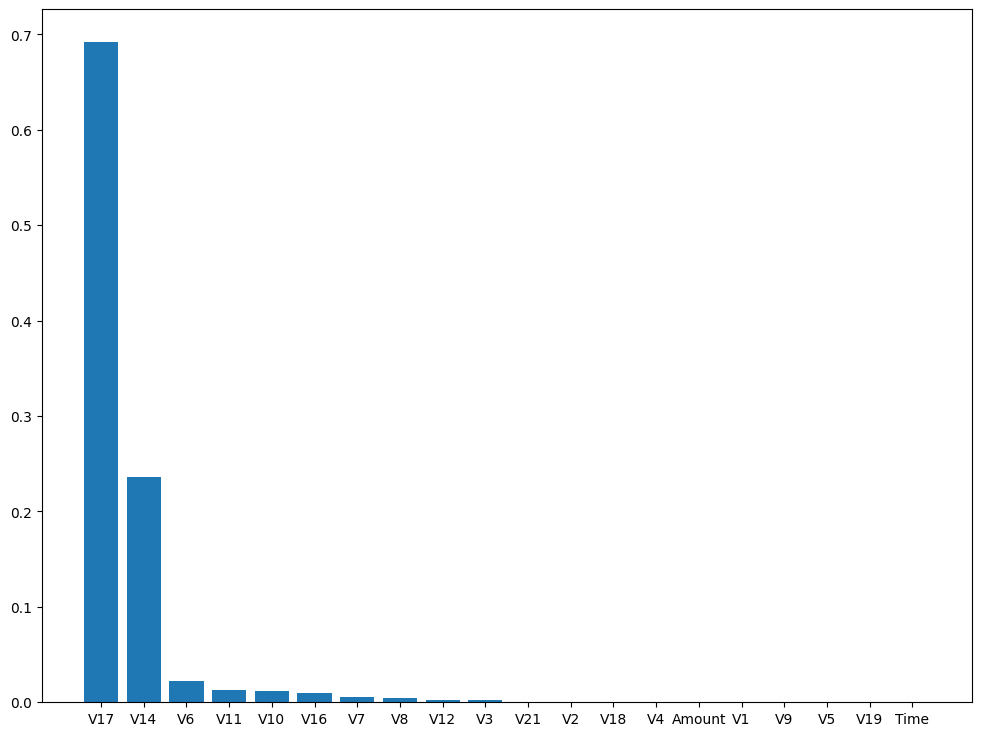

In [32]:
plt.figure(figsize=(12,9))
plt.bar(np.arange(len(index)),feature_importances_[index])

_ = plt.xticks(np.arange(len(index)),cols[index])

In [33]:
drops = ['V7','V21','V8','V5','V4','V11','V19','V1','Amount']

credit3 = data2.drop(labels=drops,axis = 1)
credit3.shape

(284807, 12)

In [34]:
from sklearn.model_selection import train_test_split
X = credit3.iloc[:,:-1]

y = credit3['Class']

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

In [36]:
y_train.value_counts()

Class
0    199017
1       347
Name: count, dtype: int64

In [37]:
smote = SMOTE()

# ndarray
X_train_new,y_train_new = smote.fit_resample(X_train,y_train)

In [38]:
type(X_train_new)
type(y_train_new)
y_train_new
y_train_new.shape

(398034,)

In [39]:
y_train_new

0         0
1         0
2         0
3         0
4         0
         ..
398029    1
398030    1
398031    1
398032    1
398033    1
Name: Class, Length: 398034, dtype: int64

In [40]:
from pandas import Series

Series(y_train_new).value_counts()

Class
0    199017
1    199017
Name: count, dtype: int64

In [41]:
# for 循环
import itertools

# 画图方法
# 绘制真实值和预测值对比情况
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    threshold = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > threshold else "black")#若对应格子上面的数量不超过阈值则，上面的字体为白色，为了方便查看

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [42]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()

# 样本均衡的数据进行训练
logistic.fit(X_train_new,y_train_new)

LogisticRegression()

In [43]:
y_ = logistic.predict(X_test)

In [44]:
# 交叉表
pd.crosstab(y_test,y_)

col_0,0,1
Class,,
0,83491,1807
1,16,129


In [45]:
#盗刷数据正确率和召回率


from sklearn.metrics import confusion_matrix

In [46]:
# 混合矩阵
cm = confusion_matrix(y_test,y_)
cm

array([[83491,  1807],
       [   16,   129]], dtype=int64)

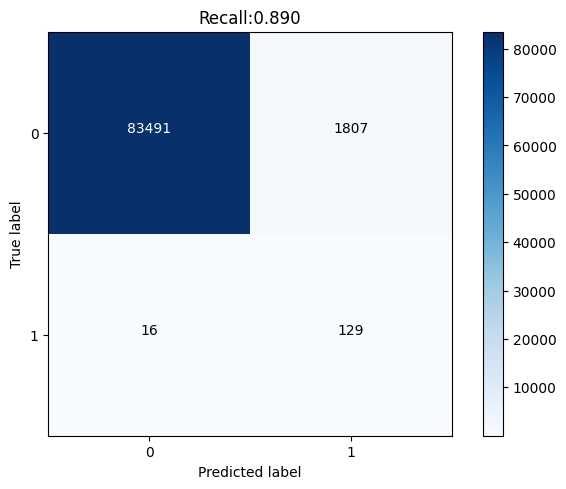

In [47]:
# Recall------“正确被检索的正样本item(TP)"占所有"应该检索到的item(TP+FN)"的比例

plot_confusion_matrix(cm,[0,1],title='Recall:%0.3f'%(cm[1,1]/(cm[1,0] + cm[1,1])))

In [49]:
from sklearn.model_selection import GridSearchCV
logistic = LogisticRegression()
clf = GridSearchCV(logistic, param_grid={'tol': [1e-3, 1e-4, 1e-5], 'C': [1, 0.1, 10, 100], 'penalty': ['l1', 'l2']}, cv=10, n_jobs=-1)
clf.fit(X_train_new, y_train_new)


D:\Software\python3.11.2\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
120 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Software\python3.11.2\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Software\python3.11.2\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\Software\python3.11.2\Lib\site-packages\sklearn\linear_model\

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1, 0.1, 10, 100], 'penalty': ['l1', 'l2'],
                         'tol': [0.001, 0.0001, 1e-05]})

In [50]:
clf.best_score_

0.925446065011575

In [51]:
clf.best_score_

0.925446065011575

In [52]:
clf.best_params_

{'C': 10, 'penalty': 'l2', 'tol': 0.001}

预测

In [64]:
import joblib

y3_ = clf.best_estimator_.predict(X_test)
# import joblib
joblib.dump( clf.best_estimator_,"best.pkl")
best = joblib.load("best.pkl")

In [54]:
confusion_matrix(y_test,y3_)

array([[83491,  1807],
       [   16,   129]], dtype=int64)

In [55]:
y2_ = clf.predict(X_test)

In [56]:
confusion_matrix(y_test,y2_)

array([[83491,  1807],
       [   16,   129]], dtype=int64)

In [57]:
y4_ = clf.predict(X_test)

cm2 = confusion_matrix(y_test,y4_)

# 结果可视化
## 对比逻辑斯蒂回归和GridSearchCV结果

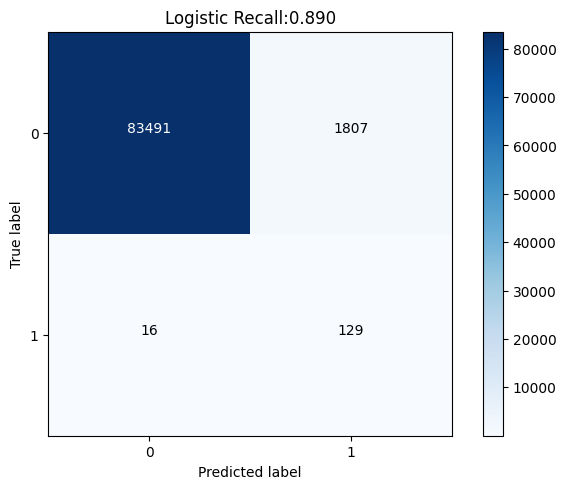

In [58]:
plot_confusion_matrix(cm,[0,1],title='Logistic Recall:%0.3f'%(cm[1,1]/(cm[1,0] + cm[1,1])))



# 模型评估
解决不同的问题，通常需要不同的指标来度量模型的性能。例如我们希望用算法来预测癌症是否是恶性的，假设100个病人中有5个病人的癌症是恶性，
对于医生来说，尽可能提高模型的 ** 查全率（recall）比提高查准率（precision） ** 更为重要，因为站在病人的角度， ** 发生漏发现癌症为恶性比发生误
判为癌症是恶性更为严重。 **
由此可见就上面的两个算法而言，明显lgb过拟合了，考虑到样本不均衡问题，故应该选用简单一点的算法（逻辑回归）来减少陷入过拟合的陷阱。
## 考虑设置阈值，来调整预测被盗刷的概率，依次来调整模型的查全率（Recall）

In [59]:
# 概率
#刷卡诈骗的容忍度？
y_proba_ = clf.predict_proba(X_test)
y_proba_

array([[0.58439317, 0.41560683],
       [0.93075073, 0.06924927],
       [0.95873213, 0.04126787],
       ...,
       [0.82708869, 0.17291131],
       [0.90332612, 0.09667388],
       [0.93730187, 0.06269813]])

In [60]:
from sklearn.metrics import auc,roc_curve

In [61]:
thresholds = [0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

recalls = []

precissions = []

aucs = []

cms = []
for threshold in thresholds:
    y_ = y_proba_[:,1] >= threshold

    cm = confusion_matrix(y_test,y_)

    recalls.append(cm[1,1]/(cm[1,0] + cm[1,1]))

    precissions.append((cm[0,0] + cm[1,1])/cm.sum())

    fpr,tpr,_ = roc_curve(y_test,y_)

    auc_ = auc(fpr,tpr)

    aucs.append(auc_)

    cms.append(cm)

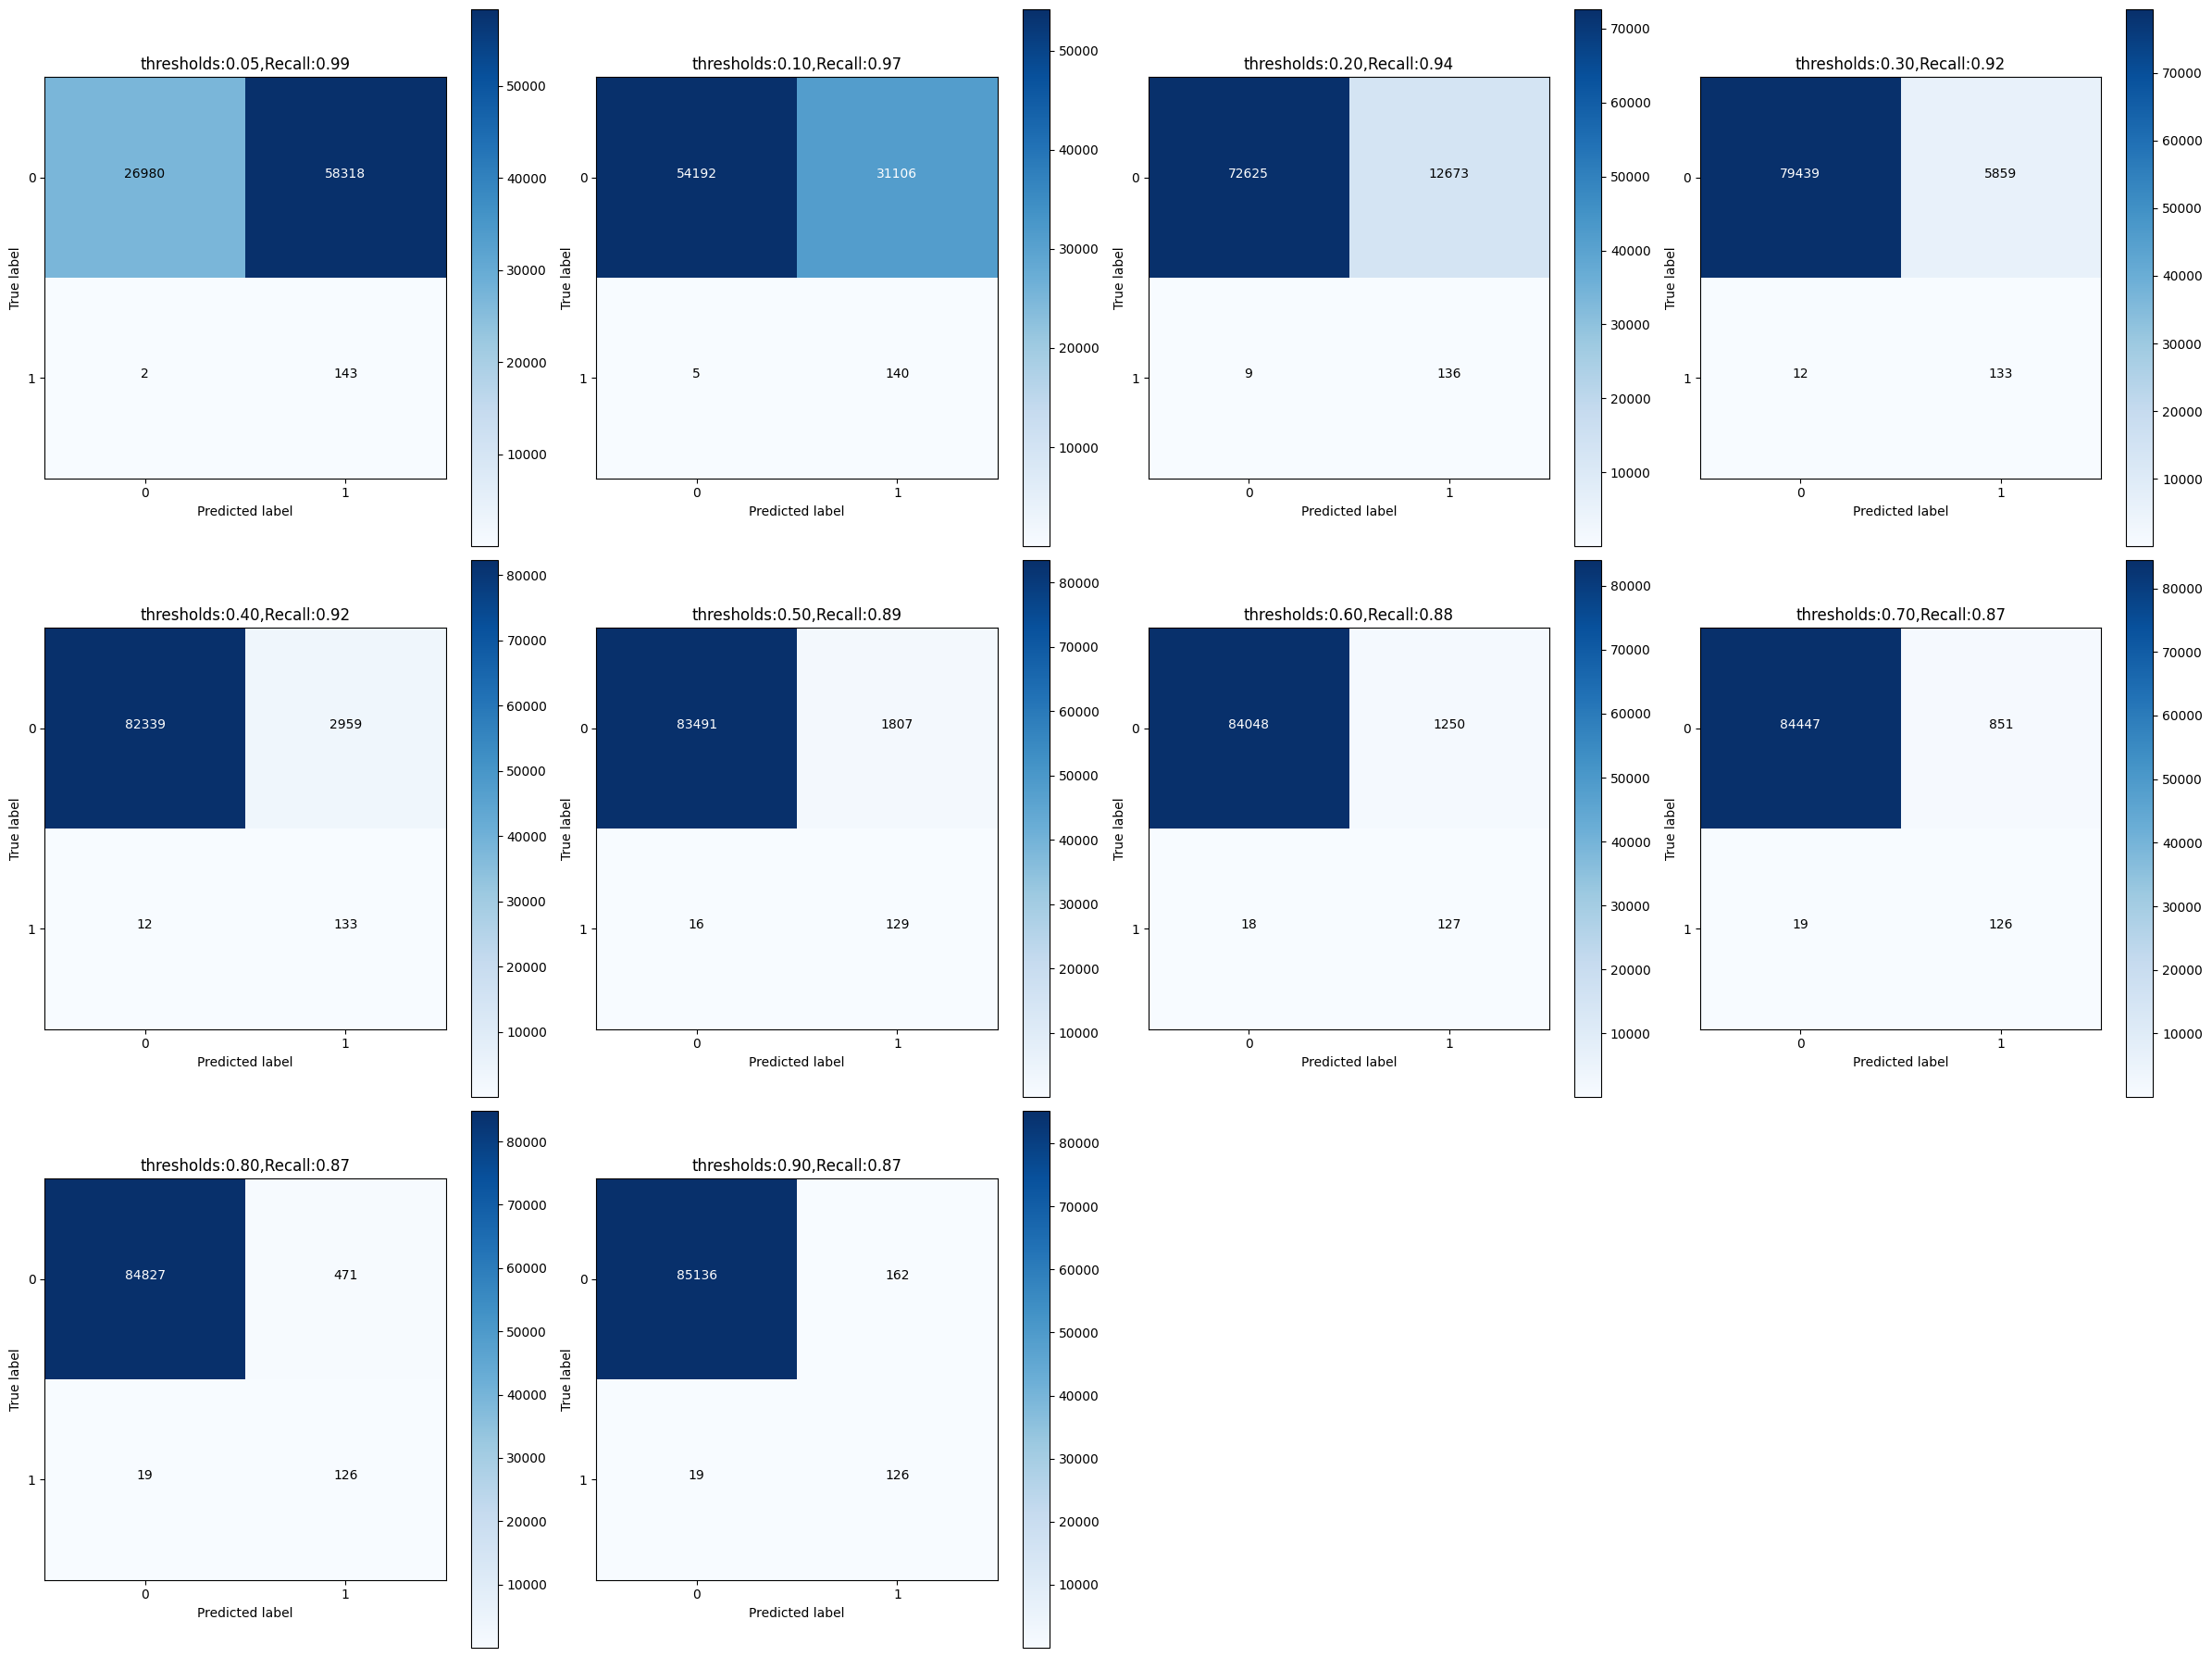

In [62]:
plt.figure(figsize=(24,18))
for i,cm in enumerate(cms):
    plt.subplot(3,4,i+1)
    plot_confusion_matrix(cm,[0,1],title='thresholds:%0.2f,Recall:%0.2f'%(thresholds[i],cm[1,1]/(cm[1,0] + cm[1,1])))

# 趋势图

Text(0.5, 0, 'thresholds')

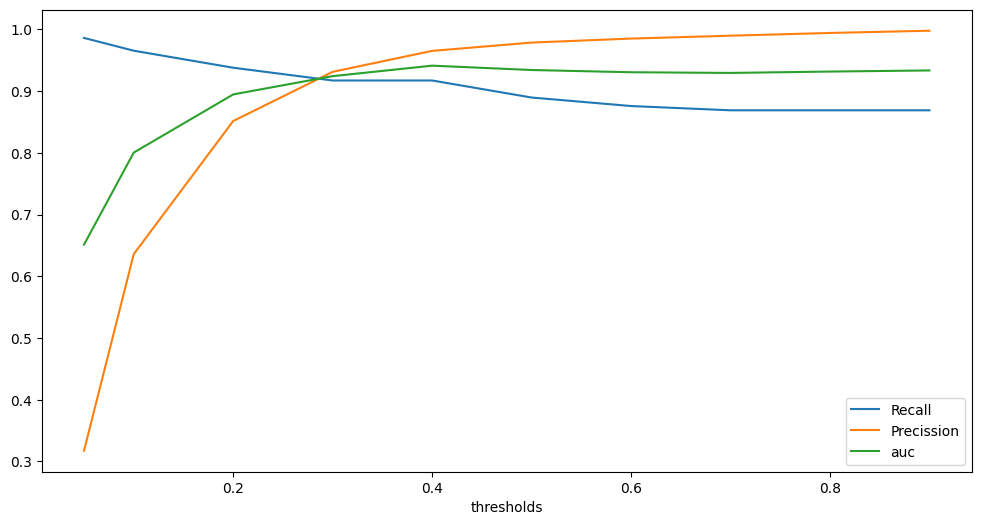

In [63]:
plt.figure(figsize=(12,6))

plt.plot(thresholds,recalls,label = 'Recall')

plt.plot(thresholds,precissions,label = 'Precission')

plt.plot(thresholds,aucs,label = 'auc')

plt.legend()

plt.xlabel('thresholds')

# plt.ylim(0.5,1.2)